In [0]:
!wget https://mypages.valdosta.edu/rpmihail/temp/index_flex_out.csv
!wget https://mypages.valdosta.edu/rpmihail/temp/middle_flex_out.csv
!wget https://mypages.valdosta.edu/rpmihail/temp/pinky_flex_out.csv
!wget https://mypages.valdosta.edu/rpmihail/temp/ring_flex_out.csv
!wget https://mypages.valdosta.edu/rpmihail/temp/thumb_flex_out.csv

--2020-03-27 13:27:56--  https://mypages.valdosta.edu/rpmihail/temp/index_flex_out.csv
Resolving mypages.valdosta.edu (mypages.valdosta.edu)... 168.18.131.237
Connecting to mypages.valdosta.edu (mypages.valdosta.edu)|168.18.131.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89586 (87K) [application/octet-stream]
Saving to: ‘index_flex_out.csv.2’

index_flex_out.csv. 100%[===================>]  87.49K   159KB/s    in 0.6s    

2020-03-27 13:27:58 (159 KB/s) - ‘index_flex_out.csv.2’ saved [89586/89586]

--2020-03-27 13:28:00--  https://mypages.valdosta.edu/rpmihail/temp/middle_flex_out.csv
Resolving mypages.valdosta.edu (mypages.valdosta.edu)... 168.18.131.237
Connecting to mypages.valdosta.edu (mypages.valdosta.edu)|168.18.131.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128277 (125K) [application/octet-stream]
Saving to: ‘middle_flex_out.csv.2’

middle_flex_out.csv 100%[===================>] 125.27K   173KB/s    in 0.7s   

1.4210854715202004e-14
Train on 1782 samples, validate on 1782 samples
Epoch 1/15
1782/1782 [==============================] - 2s 997us/step - loss: 0.1322 - val_loss: 0.0876
Epoch 2/15
1782/1782 [==============================] - 0s 15us/step - loss: 0.0652 - val_loss: 0.0405
Epoch 3/15
1782/1782 [==============================] - 0s 14us/step - loss: 0.0297 - val_loss: 0.0180
Epoch 4/15
1782/1782 [==============================] - 0s 15us/step - loss: 0.0137 - val_loss: 0.0091
Epoch 5/15
1782/1782 [==============================] - 0s 13us/step - loss: 0.0079 - val_loss: 0.0064
Epoch 6/15
1782/1782 [==============================] - 0s 14us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 7/15
1782/1782 [==============================] - 0s 14us/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/15
1782/1782 [==============================] - 0s 14us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 9/15
1782/1782 [==============================] - 0s 14us/step - loss: 0.0049 - val_loss: 0.0048
E

No handles with labels found to put in legend.


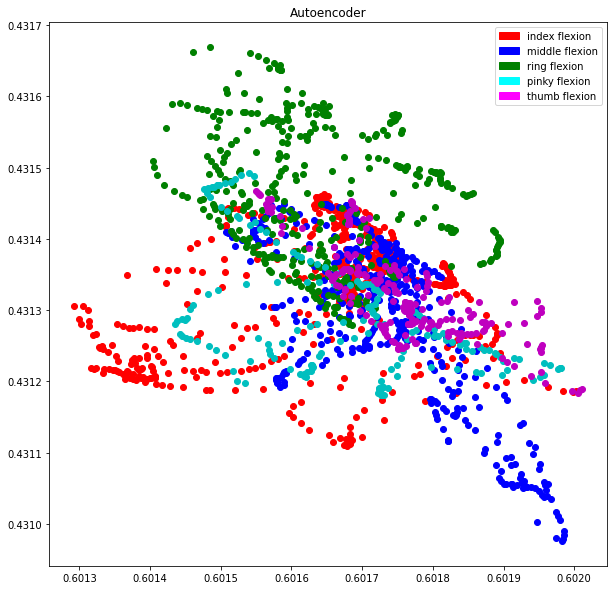

0.2617860959445091


In [0]:
import csv
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.layers import Input, Dense
from keras.models import Model

from keras.optimizers import Adam


#Get and prep data
file_names = ["index_flex_out.csv","middle_flex_out.csv","ring_flex_out.csv","pinky_flex_out.csv","thumb_flex_out.csv"]
"""while True:
    name = raw_input("Please input a file name to run t-SNE on (or \"quit\" to stop inputting): ")
    if name == "quit":
        break
    file_names.append(name)"""

data = []
for i in range(len(file_names)):
    with open(file_names[i]) as file:
        reader = list(csv.reader(file))
        data.append([])
        for j in range(len(reader)):
            data[i].append([])
            for k in range(len(reader[j])):
                data[i][j].append(float(reader[j][k]))

index_end = len(data[0])
middle_end = len(data[1]) + index_end
ring_end = len(data[2]) + middle_end
pinky_end = len(data[3]) + ring_end

formatted_data = np.asarray(data[0] + data[1] + data[2] + data[3] + data[4])

# keep track of normalization factor
normalization_factor = 180 #np.linalg.norm(formatted_data)#np.amax(formatted_data)

# normalize data
normalized_data = formatted_data / normalization_factor

print(np.amax((normalized_data * normalization_factor) - formatted_data))

#FOLLOWING MODIFIED FROM: https://blog.keras.io/building-autoencoders-in-keras.html
# this is the size of our encoded representations
encoding_dim = 2  # 2 dimensions to plot on X,Y chart

# this is our input placeholder
input_vec = Input(shape=(20,))

# Hidden layer to help with condensing
#encode_layer = Dense(10, activation='sigmoid')(input_vec)





# "encoded" is the encoded representation of the input
encode = Dense(15, activation='sigmoid')(input_vec)
encode1 = Dense(10, activation='sigmoid')(encode)
encode2 = Dense(5, activation='sigmoid')(encode1)

encoded = Dense(encoding_dim, activation='sigmoid')(encode2)

# Hidden layer to help with expanding
# decode_layer = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(5, activation='sigmoid')(encoded)
decode1 = Dense(10, activation='sigmoid')(decoded)
decode = Dense(15, activation='sigmoid')(decode1)

out = Dense(20, activation='sigmoid')(decode)




# this model maps an input to its reconstruction
autoencoder = Model(input_vec, out)

# this model maps an input to its encoded representation
encoder = Model(input_vec, encoded)

# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer_4 = autoencoder.layers[-1]
decoder_layer_3 = autoencoder.layers[-2]
decoder_layer_2 = autoencoder.layers[-3]
decoder_layer_1 = autoencoder.layers[-4]

# create the decoder model
decoder = Model(encoded_input, decoder_layer_4(decoder_layer_3(decoder_layer_2(decoder_layer_1(encoded_input)))))

opt = Adam(lr=0.01)
autoencoder.compile(optimizer=opt, loss='mse')

autoencoder.fit(normalized_data, normalized_data,
            epochs=15,
            batch_size=256,
            shuffle=False,
            validation_data=(normalized_data, normalized_data))

encoded_pts = encoder.predict(normalized_data)

plt.figure(figsize=(10, 10))
plt.plot(encoded_pts[:index_end,0], encoded_pts[:index_end,1], 'ro',
    encoded_pts[index_end:middle_end,0], encoded_pts[index_end:middle_end,1], 'bo',
    encoded_pts[middle_end:ring_end,0], encoded_pts[middle_end:ring_end,1], 'go',
    encoded_pts[ring_end:pinky_end,0], encoded_pts[ring_end:pinky_end,1], 'co',
    encoded_pts[pinky_end:,0], encoded_pts[pinky_end:,1], 'mo'
    )

red_patch = mpatches.Patch(color='red', label='index flexion')
blue_patch = mpatches.Patch(color='blue', label='middle flexion')
green_patch = mpatches.Patch(color='green', label='ring flexion')
cyan_patch = mpatches.Patch(color='cyan', label='pinky flexion')
magenta_patch = mpatches.Patch(color='magenta', label='thumb flexion')
plt.title("Autoencoder")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(handles=[red_patch, blue_patch, green_patch, cyan_patch, magenta_patch])
plt.show()

decoded_pts = decoder.predict(encoded_pts)
#print(np.amax((normalization_factor * decoded_pts) - formatted_data))
print(np.amax(decoded_pts - normalized_data))
#print(normalized_data)



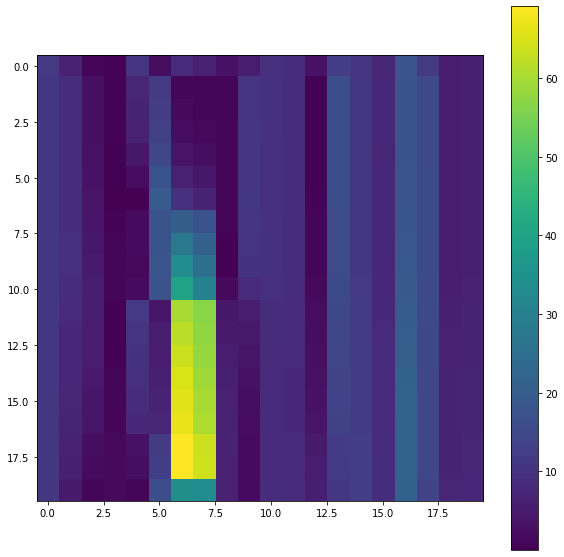

In [0]:
#normalized_data 

errors = np.abs(normalized_data*180 - decoded_pts*180)

plt.figure(figsize=(10, 10))
plt.imshow(errors[0:20, :])
plt.colorbar()

#normalized_data
